In [177]:
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [178]:
data_folders= [
    "About22cm",
    "About82cm",
    "About143cm",
]

err_correction_type="pretrained" #[no, gt, pretrained]
# freqs_to_use=[775e6, 815e6, 875e6, 915e6, 975e6]
freqs_to_use=[835e6, 885e6, 915e6]

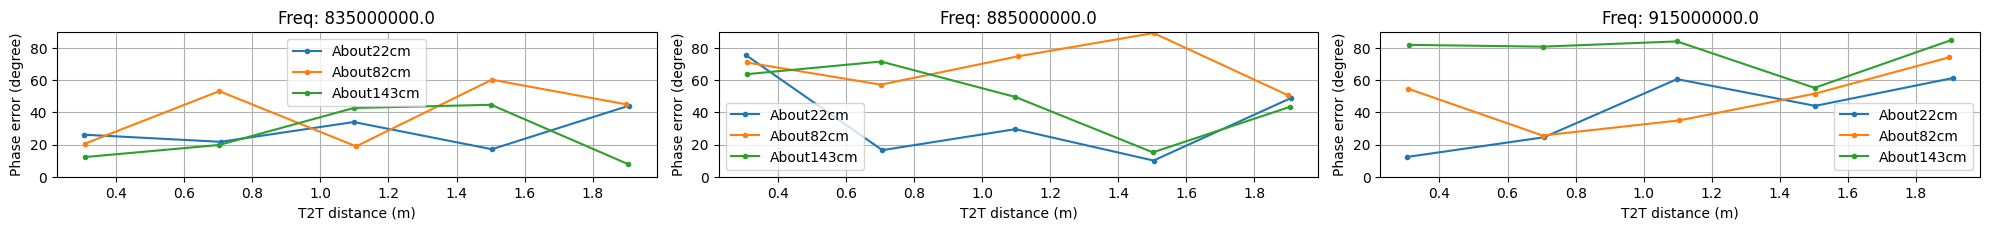

In [179]:
plt.figure(figsize=(20,4))
for f_idx,freq_to_use in enumerate(freqs_to_use):
    plt.subplot(len(freqs_to_use)//3+1, 3,f_idx+1)
    # for idx,d in enumerate([data_folders[0],data_folders[-1]]):
    for idx,d in enumerate(data_folders):
        
        with open(f"{d}/{err_correction_type}_correction_all_errs.pkl",'rb') as f:
            error_data=pickle.load(f)[freq_to_use]
        # if idx==0 :
            plt.plot((error_data.keys()), np.rad2deg(np.array(list(error_data.values()))), '.-', label=d)
        
    plt.title(f"Freq: {freq_to_use}")
    plt.ylim([0,90])
    plt.xlabel("T2T distance (m)")
    plt.ylabel("Phase error (degree)")
    plt.legend()
    plt.grid()
plt.tight_layout()        
plt.show()

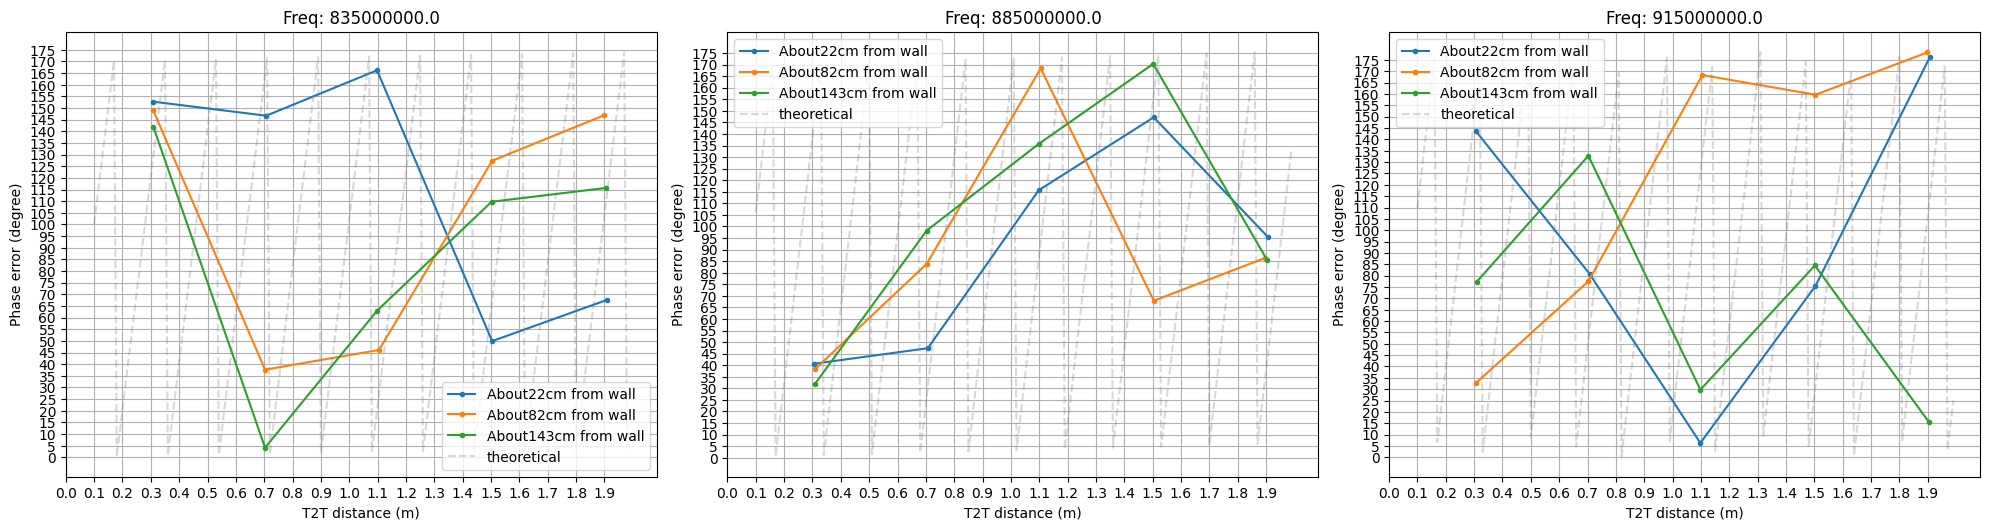

In [180]:
plt.figure(figsize=(20,10))
for f_idx,freq_to_use in enumerate(freqs_to_use):
    plt.subplot(len(freqs_to_use)//3+1, 3,f_idx+1)
    # for idx,d in enumerate([data_folders[0],data_folders[-1]]):
    for idx,d in enumerate(data_folders):
        
        with open(f"{d}/{err_correction_type}_correction_all_phases.pkl",'rb') as f:
            phase_ests=pickle.load(f)[freq_to_use]
        # if idx==0 :
            plt.plot((phase_ests.keys()), np.rad2deg(np.array(list(phase_ests.values()))), '.-', label=d+" from wall")
        
        if idx==2:
            with open(f"{d}/theoretical_phase.pkl",'rb') as f:
                    theoretical_phases=pickle.load(f)[freq_to_use]
                    plt.plot((theoretical_phases.keys()), np.rad2deg(np.array(list(theoretical_phases.values()))), '--', label="theoretical", color='gray', alpha=0.3)
        
    plt.title(f"Freq: {freq_to_use}")
    # plt.ylim([0,90])
    plt.xlabel("T2T distance (m)")
    plt.ylabel("Phase error (degree)")
    # plt.xticks(np.array([30,70,110,150,190])/100)
    plt.xticks(np.arange(0,2,0.1))
    plt.yticks(np.arange(0,180,5))
    plt.legend()
    plt.grid()
plt.tight_layout()        
plt.show()

# Following is influenced by the exciter location.

In [181]:
features=[]
labels=[]

for folder in data_folders:
# for folder in [data_folders[0],data_folders[1]]:
    with open(f"{folder}/processedDF.pkl",'rb') as f:
        processedDF=pickle.load(f)
        for dist in sorted(processedDF["Dist (m)"]):
            # for freq in raw_mpps[dist]:
            for freq in [885]:
                medians_mpp1=[]
                medians_mpp2=[]
                mpp1=processedDF[(processedDF["Dist (m)"]==dist) & (processedDF["Frequency (MHz)"]==freq) & (processedDF["Rx"]=="Tag1") & (processedDF["Tx"]=="Tag2")] 
                mpp2=processedDF[(processedDF["Dist (m)"]==dist) & (processedDF["Frequency (MHz)"]==freq) & (processedDF["Rx"]=="Tag2") & (processedDF["Tx"]=="Tag1")] 
                # print(mpp1[f"Phase{1}"].iloc[0])
                for phase in [1,3,4,6,7,8]:
                    medians_mpp1.append(np.mean(mpp1[f"Phase{phase}"].iloc[0]))
                    medians_mpp2.append(np.mean(mpp2[f"Phase{phase}"].iloc[0]))
                # feature_list=medians_mpp1
                feature_list=medians_mpp1+medians_mpp2
                # feature_list.append(freq)
                # feature_list.append(dist)
                features.append(feature_list)
                labels.append(folder)
                
features_np=np.zeros([len(features), len(features[0])])
for idx, lst in enumerate(features):
    features_np[idx]=lst
        

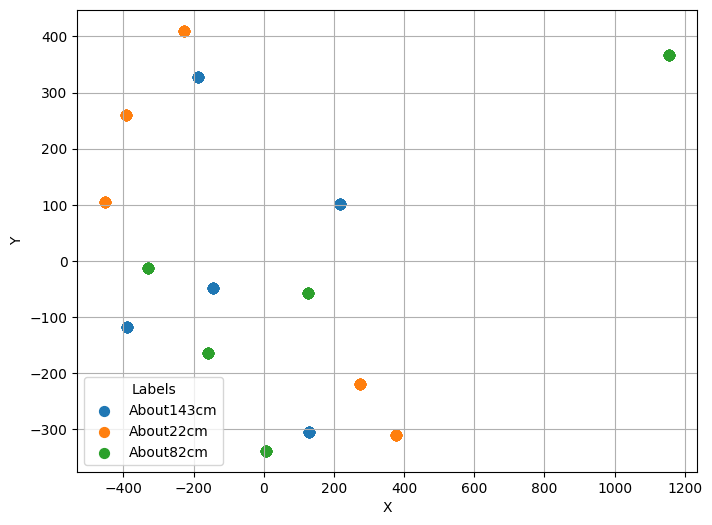

In [182]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(features_np)


data = np.array(principalComponents)
labels = np.array(labels)

unique_labels = np.unique(labels)
# colors = plt.cm.get_cmap('tab10', len(unique_labels))  # color map with distinct colors

plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    indices = labels == label
    plt.scatter(data[indices, 0], data[indices, 1], 
                label=str(label), s=50)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Labels')
# plt.title('2D Points Colored by Label')
plt.grid(True)
plt.show()

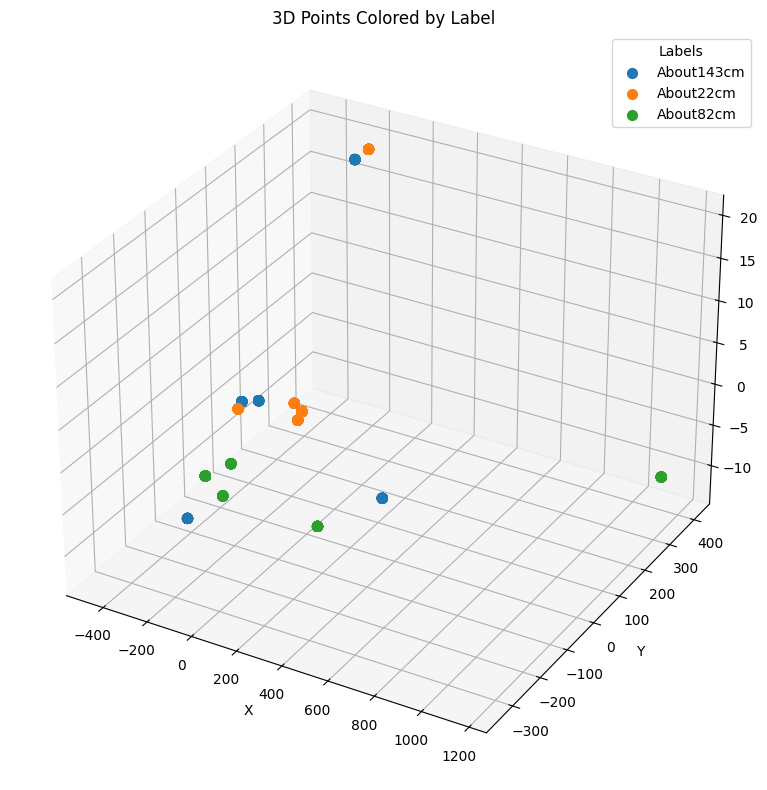

In [183]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(features_np)

data = np.array(principalComponents)
labels = np.array(labels)

unique_labels = np.unique(labels)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(unique_labels):
    indices = labels == label
    ax.scatter(data[indices, 0], data[indices, 1], data[indices, 2],
                 label=str(label), s=50)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(title='Labels')
ax.set_title('3D Points Colored by Label')
plt.tight_layout()
plt.show()
